# DSA210 Term Project: Colorectal Cancer Survival Analysis 

In [130]:
import pandas as pd
import numpy as np
df = pd.read_excel("DSA210_data.xlsx")

## Data Preprocessing & Enrichment

In [132]:
df.head()

,Patient_ID,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,...,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction
0,1,UK,77,M,Localized,69,No,No,Yes,Overweight,...,Yes,No,54413,50,5,Urban,Developed,Moderate,Insured,Yes
1,2,UK,59,M,Localized,33,No,No,No,Overweight,...,Yes,No,76553,37,25,Urban,Developing,High,Uninsured,Yes
2,3,Japan,66,M,Regional,17,No,Yes,No,Normal,...,Yes,No,62805,54,27,Urban,Developed,Moderate,Uninsured,No
3,4,USA,83,M,Regional,14,No,No,No,Obese,...,Yes,No,89393,45,11,Urban,Developed,Moderate,Insured,Yes
4,5,France,66,M,Localized,34,No,Yes,No,Normal,...,Yes,No,66425,15,27,Urban,Developing,High,Insured,Yes


In [133]:
df.info() # to understand the data and what are the parameters

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Patient_ID                  20000 non-null  int64 
 1   Country                     20000 non-null  object
 2   Age                         20000 non-null  int64 
 3   Gender                      20000 non-null  object
 4   Cancer_Stage                20000 non-null  object
 5   Tumor_Size_mm               20000 non-null  int64 
 6   Family_History              20000 non-null  object
 7   Smoking_History             20000 non-null  object
 8   Alcohol_Consumption         20000 non-null  object
 9   Obesity_BMI                 20000 non-null  object
 10  Diet_Risk                   20000 non-null  object
 11  Physical_Activity           20000 non-null  object
 12  Diabetes                    20000 non-null  object
 13  Inflammatory_Bowel_Disease  20000 non-null  ob

In [134]:
df.describe() # what are the descriptive statistics?

,Patient_ID,Age,Tumor_Size_mm,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,69.138300,42.045600,72309.307600,34.398100,17.042550
std,5773.647028,11.866845,21.724811,27558.797301,14.367217,7.222247
min,1.000000,30.000000,5.000000,25000.000000,10.000000,5.000000
25%,5000.750000,59.000000,23.000000,48406.750000,22.000000,11.000000
50%,10000.500000,69.000000,42.000000,72139.500000,34.000000,17.000000
75%,15000.250000,79.000000,61.000000,96454.000000,47.000000,23.000000
max,20000.000000,89.000000,79.000000,119994.000000,59.000000,29.000000


In [135]:
# Define a function to assign age distribution score based on age
def get_age_distribution_score(age):
    if 0 <= age <= 19:
        return 0.00044
    elif 20 <= age <= 44:
        return 0.02015
    elif 45 <= age <= 69:
        return 0.40631
    elif age >= 70:
        return 0.57310

In [141]:
######### Apply the age distibution score, with function

In [143]:
df['age_distribution_score'] = df['Age'].apply(get_age_distribution_score)

In [145]:
df[['Age','age_distribution_score']].head(8)

,Age,age_distribution_score
0,77,0.57310
1,59,0.40631
2,66,0.40631
3,83,0.57310
4,66,0.40631
5,69,0.40631
6,79,0.57310
7,89,0.57310


In [147]:
# Dictionary mapping countries to their ASR scores
country_asr_mapping = {
    'China': 20.1,
    'USA': 27.0,
    'Japan': 36.6,
    'Russia': 29.4,
    'India': 4.9,
    'Germany': 25.7,
    'Brazil': 19.8,
    'Italy': 30.6,
    'France': 32.1,
    'UK': 30.9
}

# Map the country names to the corresponding ASR score
df['Country_ASR_Score'] = df['Country'].map(country_asr_mapping)

In [149]:
df['Country_ASR_Score'] = df['Country'].map(country_asr_mapping).fillna(0)  
# or use np.nan for missing values

In [151]:
df[['Country','Country_ASR_Score']].head(8)

,Country,Country_ASR_Score
0,UK,30.9
1,UK,30.9
2,Japan,36.6
3,USA,27.0
4,France,32.1
5,Japan,36.6
6,Canada,0.0
7,Germany,25.7


In [153]:
df.shape

(20000, 30)

In [155]:
df.dtypes

Patient_ID                      int64
Country                        object
Age                             int64
Gender                         object
Cancer_Stage                   object
Tumor_Size_mm                   int64
Family_History                 object
Smoking_History                object
Alcohol_Consumption            object
Obesity_BMI                    object
Diet_Risk                      object
Physical_Activity              object
Diabetes                       object
Inflammatory_Bowel_Disease     object
Genetic_Mutation               object
Screening_History              object
Early_Detection                object
Treatment_Type                 object
Survival_5_years               object
Mortality                      object
Healthcare_Costs                int64
Incidence_Rate_per_100K         int64
Mortality_Rate_per_100K         int64
Urban_or_Rural                 object
Economic_Classification        object
Healthcare_Access              object
Insurance_St

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Patient_ID                  20000 non-null  int64  
 1   Country                     20000 non-null  object 
 2   Age                         20000 non-null  int64  
 3   Gender                      20000 non-null  object 
 4   Cancer_Stage                20000 non-null  object 
 5   Tumor_Size_mm               20000 non-null  int64  
 6   Family_History              20000 non-null  object 
 7   Smoking_History             20000 non-null  object 
 8   Alcohol_Consumption         20000 non-null  object 
 9   Obesity_BMI                 20000 non-null  object 
 10  Diet_Risk                   20000 non-null  object 
 11  Physical_Activity           20000 non-null  object 
 12  Diabetes                    20000 non-null  object 
 13  Inflammatory_Bowel_Disease  200

In [159]:
df.isnull().sum() / df.shape[0] #NaN Values

Patient_ID                    0.0
Country                       0.0
Age                           0.0
Gender                        0.0
Cancer_Stage                  0.0
Tumor_Size_mm                 0.0
Family_History                0.0
Smoking_History               0.0
Alcohol_Consumption           0.0
Obesity_BMI                   0.0
Diet_Risk                     0.0
Physical_Activity             0.0
Diabetes                      0.0
Inflammatory_Bowel_Disease    0.0
Genetic_Mutation              0.0
Screening_History             0.0
Early_Detection               0.0
Treatment_Type                0.0
Survival_5_years              0.0
Mortality                     0.0
Healthcare_Costs              0.0
Incidence_Rate_per_100K       0.0
Mortality_Rate_per_100K       0.0
Urban_or_Rural                0.0
Economic_Classification       0.0
Healthcare_Access             0.0
Insurance_Status              0.0
Survival_Prediction           0.0
age_distribution_score        0.0
Country_ASR_Sc

## Exploratory Data Analysis

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [163]:
import warnings

# To suppress all warnings
warnings.filterwarnings('ignore')

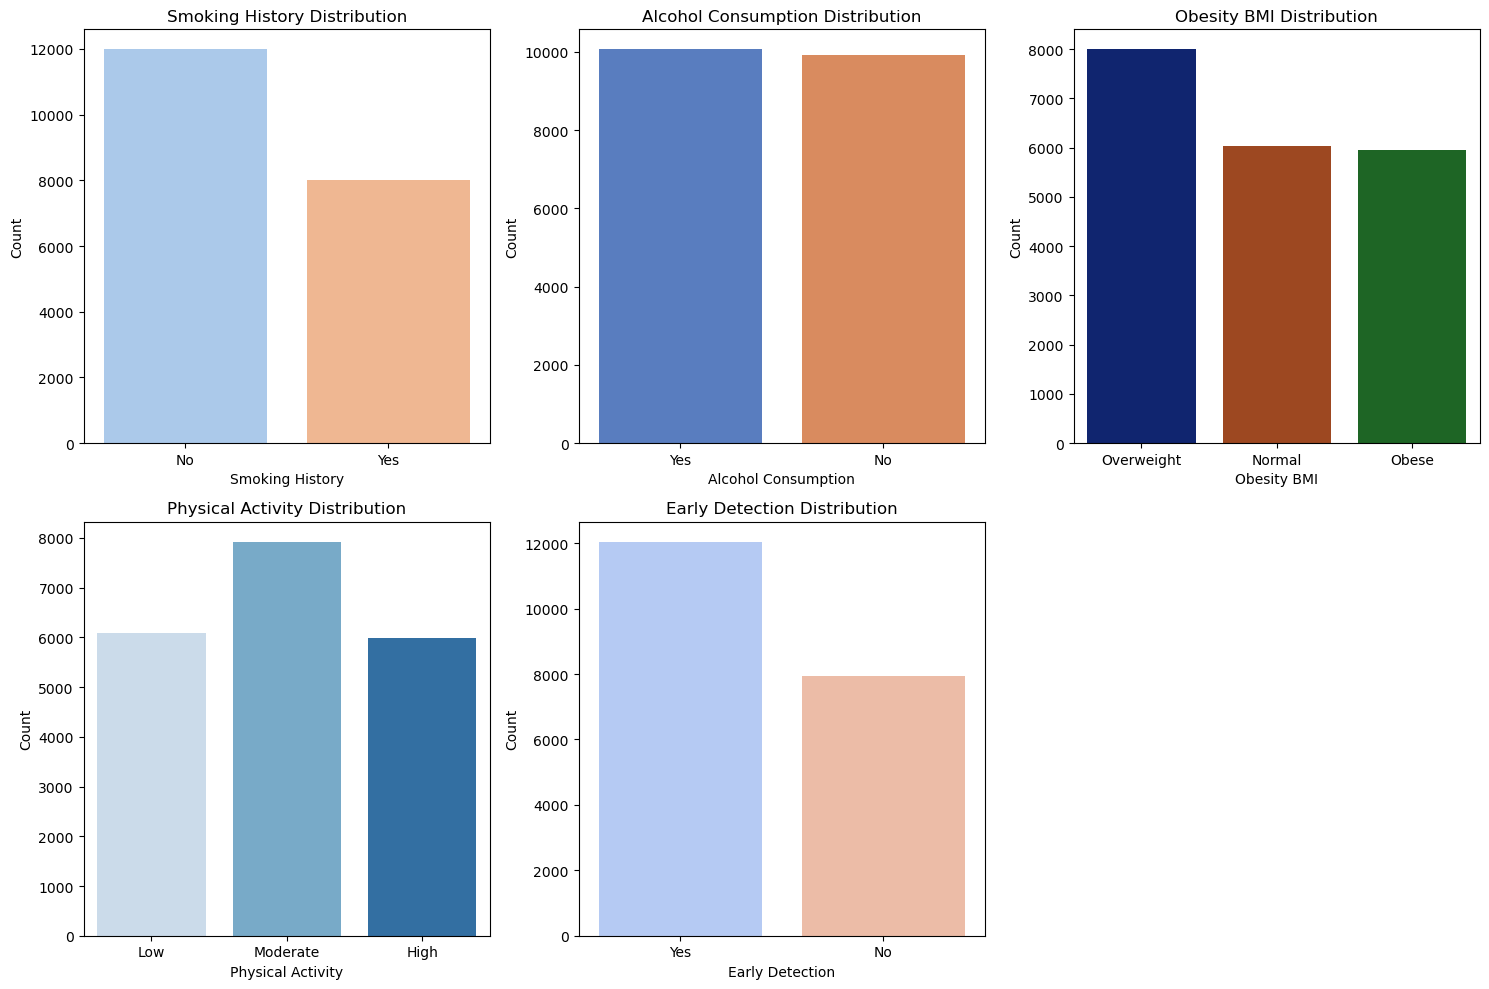

In [165]:
# Set the figure size for the subplots
plt.figure(figsize=(15, 10))

# Smoking History Distribution (Categorical)
plt.subplot(2, 3, 1)
sns.countplot(data=df, x='Smoking_History', palette='pastel')
plt.title('Smoking History Distribution')
plt.xlabel('Smoking History')
plt.ylabel('Count')

# Alcohol Consumption Distribution (Categorical)
plt.subplot(2, 3, 2)
sns.countplot(data=df, x='Alcohol_Consumption', palette='muted')
plt.title('Alcohol Consumption Distribution')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Count')

# Obesity BMI Distribution (Categorical)
plt.subplot(2, 3, 3)
sns.countplot(data=df, x='Obesity_BMI', palette='dark')
plt.title('Obesity BMI Distribution')
plt.xlabel('Obesity BMI')
plt.ylabel('Count')

# Physical Activity Distribution (Categorical)
plt.subplot(2, 3, 4)
sns.countplot(data=df, x='Physical_Activity', palette='Blues')
plt.title('Physical Activity Distribution')
plt.xlabel('Physical Activity')
plt.ylabel('Count')

# Early Detection Distribution (Categorical)
plt.subplot(2, 3, 5)
sns.countplot(data=df, x='Early_Detection', palette='coolwarm')
plt.title('Early Detection Distribution')
plt.xlabel('Early Detection')
plt.ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

*  Using seaborn's countplot function, it is found that the data is fairly distributed in terms of Alcohol Consumption; but for Physical Activity, Early Detection, Obesity BMI and Smoking History it has slightly less fair distribution.

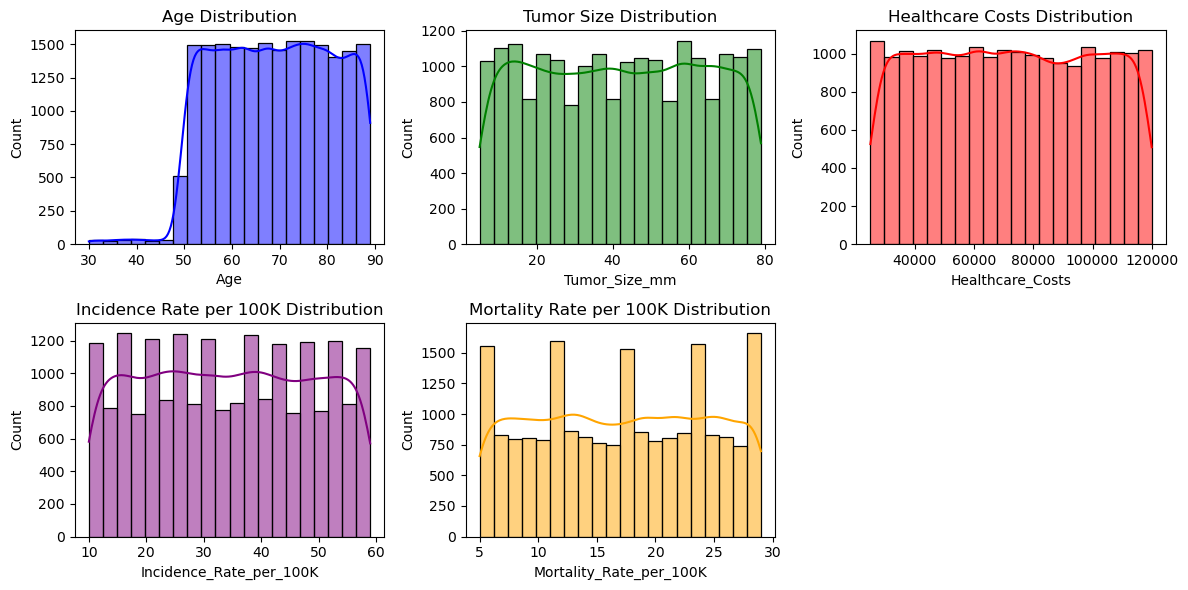

In [167]:
# 1. Distribution of Continuous Variables (e.g., Age, Tumor Size, Healthcare Costs)
plt.figure(figsize=(12, 6))

# Age Distribution
plt.subplot(2, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')

# Tumor Size Distribution
plt.subplot(2, 3, 2)
sns.histplot(df['Tumor_Size_mm'], bins=20, kde=True, color='green')
plt.title('Tumor Size Distribution')

# Healthcare Costs Distribution
plt.subplot(2, 3, 3)
sns.histplot(df['Healthcare_Costs'], bins=20, kde=True, color='red')
plt.title('Healthcare Costs Distribution')

# Incidence Rate Distribution
plt.subplot(2, 3, 4)
sns.histplot(df['Incidence_Rate_per_100K'], bins=20, kde=True, color='purple')
plt.title('Incidence Rate per 100K Distribution')

# Mortality Rate Distribution
plt.subplot(2, 3, 5)
sns.histplot(df['Mortality_Rate_per_100K'], bins=20, kde=True, color='orange')
plt.title('Mortality Rate per 100K Distribution')

plt.tight_layout()
plt.show()

Age Distribution
* Shows a sharp increase around age 50, suggesting most data points are from patients older than 50.
* The KDE plot confirms a right-skewed distribution with the highest concentration around 60–75 years.
* This could reflect a targeted age group for a health-related dataset (e.g. cancer patients).

Tumor Size Distribution
- Tumor sizes are evenly distributed between about 5 mm and 80 mm.
- No significant skew or clustering, implying data might have been randomly or uniformly sampled.
- Smooth KDE curve shows moderate density across the range with slight dips and peaks.

Healthcare Costs Distribution
* Healthcare costs range widely from around $30,000 to $120,000.
* Distribution is quite uniform, suggesting the dataset may cover patients across varied healthcare plans or treatments.
* KDE plot confirms no strong skewness or concentration.

Incidence Rate per 100K Distribution
- Incidence rates are spread across 10 to 60 per 100K.
- Appears quite balanced, with most values between 15–50.
- KDE plot is fairly smooth, suggesting a healthy distribution for modeling or analysis.

Mortality Rate per 100K Distribution
* Mortality rates range from 5 to 30 per 100K, with a saw-tooth pattern in the histogram, indicating possible rounding or grouping effects in data collection.
* The KDE is relatively flat but consistent, implying moderate mortality variation.

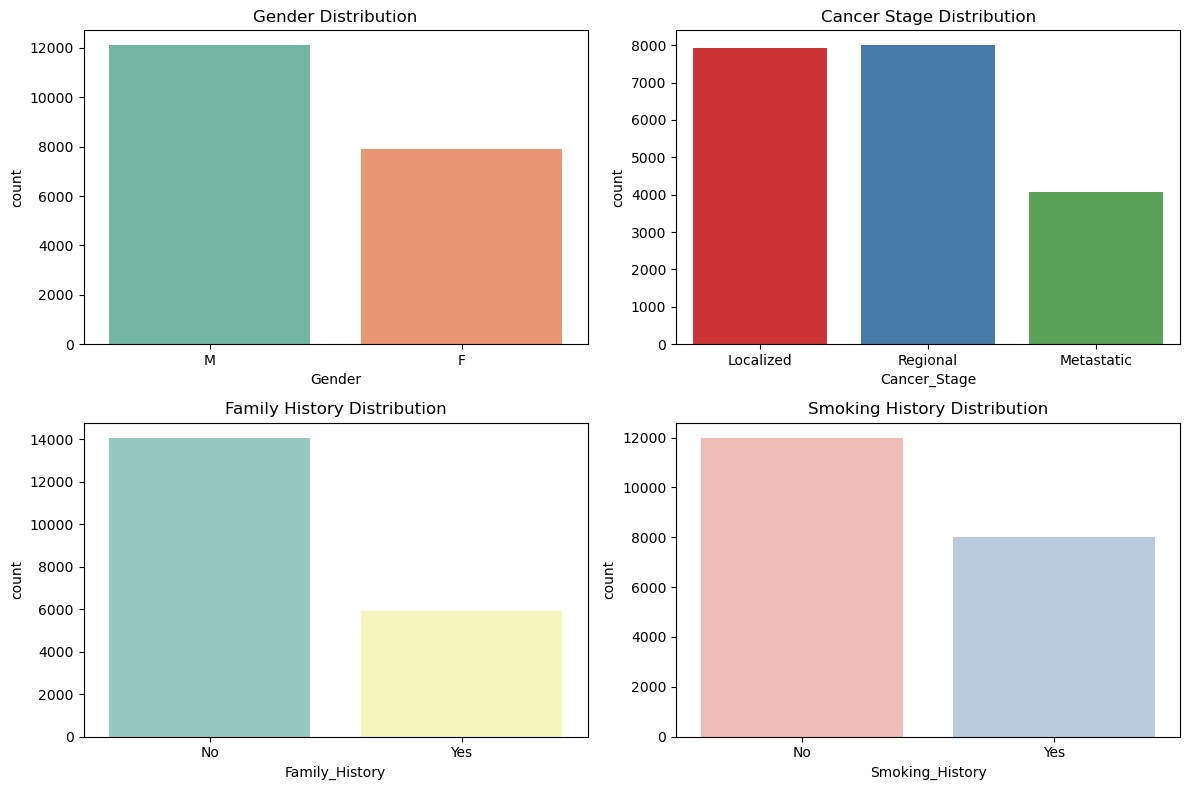

In [46]:
# 2. Bar plots for categorical data (e.g., Gender, Cancer Stage, Family History)
plt.figure(figsize=(12, 8))

# Gender Distribution
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Gender', palette='Set2')  # Updated palette
plt.title('Gender Distribution')

# Cancer Stage Distribution
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='Cancer_Stage', palette='Set1')  # Updated palette
plt.title('Cancer Stage Distribution')

# Family History Distribution
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Family_History', palette='Set3')  # Updated palette
plt.title('Family History Distribution')

# Smoking History Distribution
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='Smoking_History', palette='Pastel1')  # Updated palette
plt.title('Smoking History Distribution')

plt.tight_layout()
plt.show()


Gender Distribution
* Majority of the data belongs to males, with around 12,000 records.
* Females are underrepresented with about 8,000 records.
* Could indicate a gender imbalance in the dataset, possibly due to disease prevalence, screening policies, or sampling methods.

Cancer Stage Distribution
- The distribution between Localized and Regional stages is quite even, each with around 8,000 records.
- The Metastatic stage is significantly lower (around 4,000), possibly due to:
- Fewer patients being diagnosed at this advanced stage.
- Underreporting or survivorship bias
- This distribution might affect model training if you're predicting cancer stages.

Family History Distribution
* Most individuals do not have a family history of the condition (~14,000).
* Those with a family history are notably fewer (~6,000).
* This could suggest that genetic predisposition is not the dominant factor, or it may reflect limited recorded family medical history.

Smoking History Distribution
- Around 12,000 people reported no smoking history, while ~8,000 had a smoking history.
- Smoking is a known risk factor for many diseases, so this could be an important feature in analysis.
- The difference is notable but not extreme, allowing for some comparative analysis.

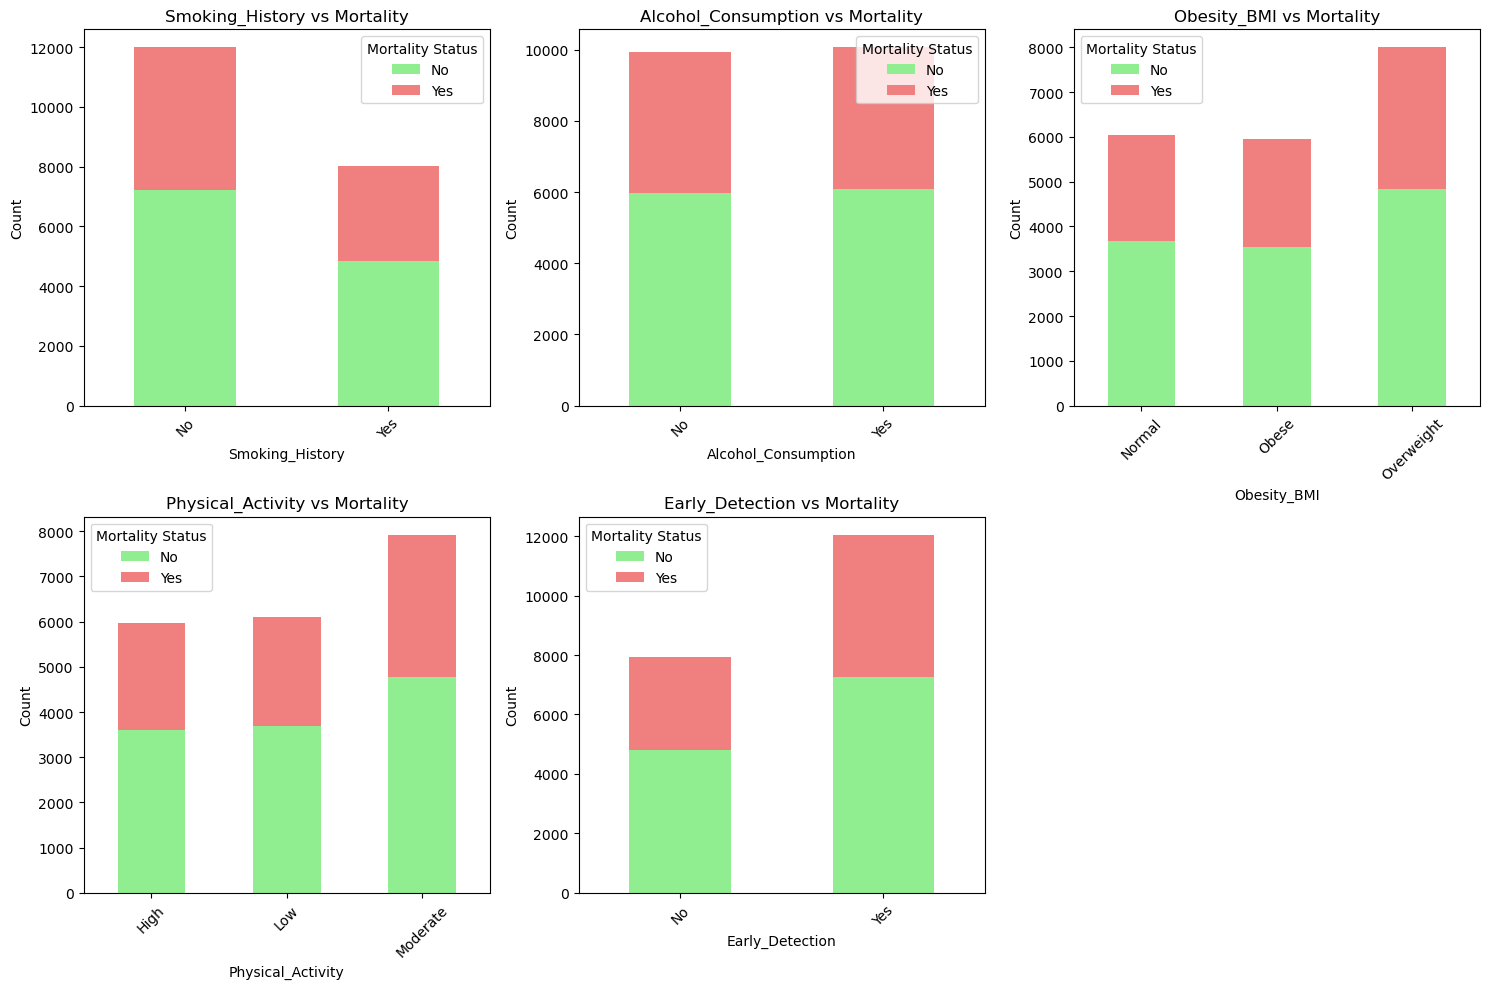

In [189]:
# Set the figure size for the subplots
plt.figure(figsize=(15, 10))

# List of categorical variables
categorical_vars = ['Smoking_History', 'Alcohol_Consumption', 'Obesity_BMI', 'Physical_Activity', 'Early_Detection']

# Iterate through each categorical variable to create plots
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 3, i)
    mortality_counts = df.groupby(var)['Mortality'].value_counts()
    mortality_counts.unstack().plot(kind='bar', stacked=True, color=['lightgreen', 'lightcoral'], ax=plt.gca())
    plt.title(f'{var} vs Mortality')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title="Mortality Status")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Smoking History vs Mortality
* Higher proportion of deceased patients among smokers compared to non-smokers.
* Suggests smoking is associated with increased mortality risk.

Alcohol Consumption vs Mortality
* The mortality rate appears similar in both alcohol consumers and non-consumers.
* Implies alcohol consumption may not be a strong differentiator for mortality in this dataset, or further analysis is needed to clarify.

Obesity (BMI) vs Mortality
* Overweight individuals show higher total count and more mortality cases than other BMI categories.
* Interestingly, both “Obese” and “Normal” categories have comparable death rates, hinting that BMI alone may not be linear with mortality.
* Consider analyzing interactions with other variables (e.g., age or activity level).

Physical Activity vs Mortality
* Patients with moderate activity have the lowest mortality, followed by high activity.
* Low activity group has a notably higher death count.
* Indicates that physical activity could be a protective factor.

Early Detection vs Mortality
* Significant difference: Patients with early detection show a much lower mortality rate.
* Strong evidence that early diagnosis greatly improves survival—a critical insight for preventive healthcare strategies.

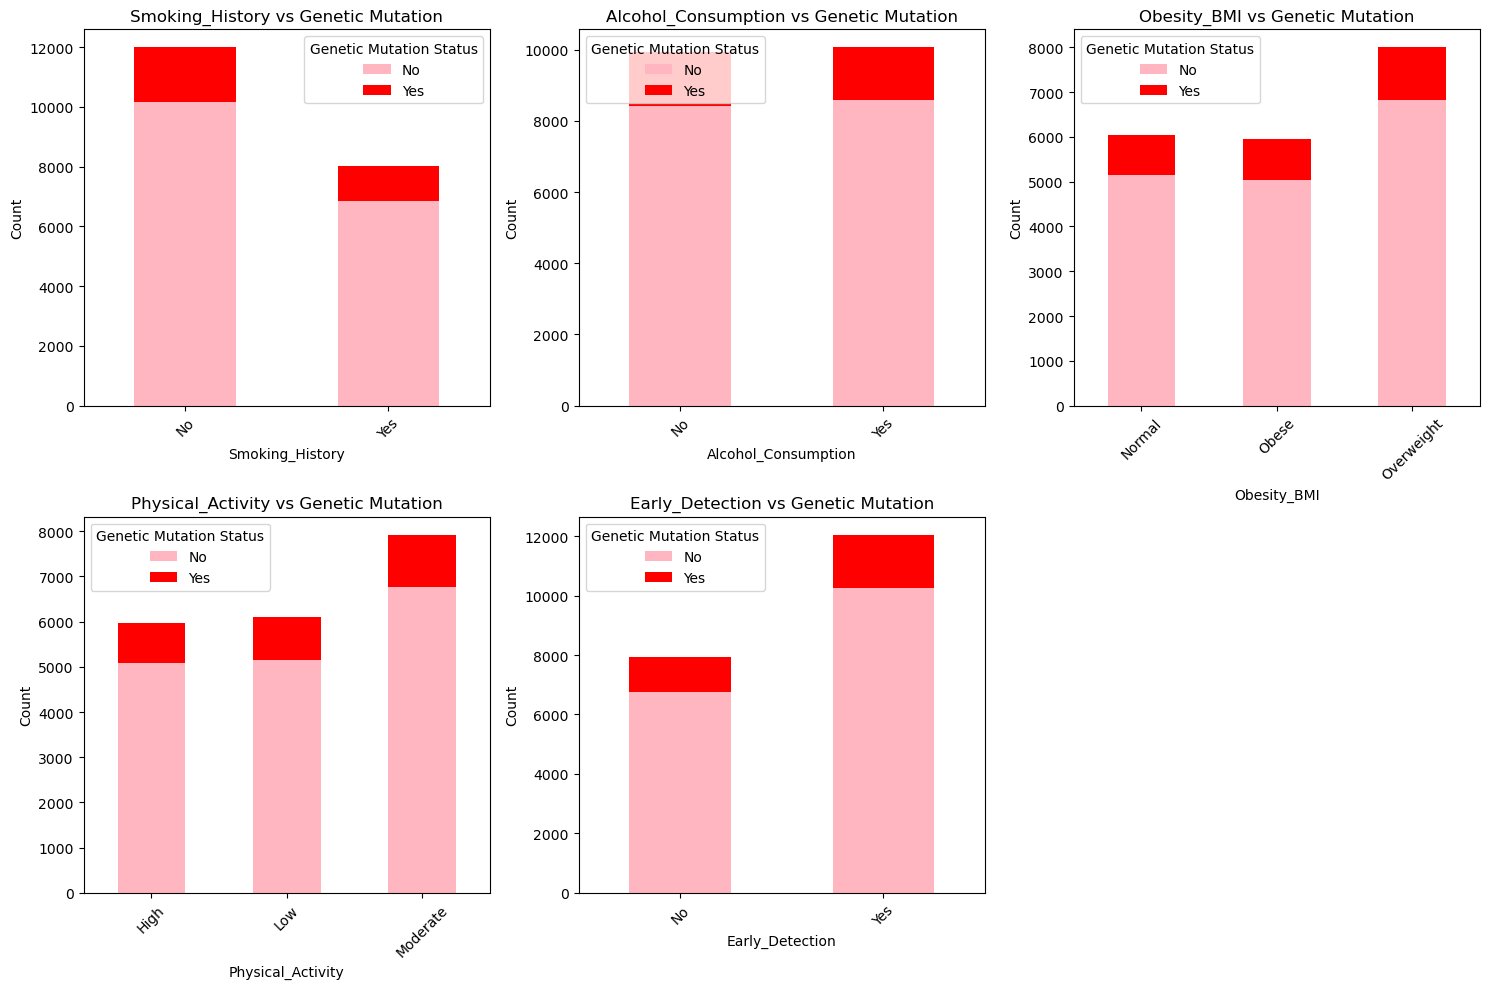

In [195]:
# Set the figure size for the subplots
plt.figure(figsize=(15, 10))

# List of categorical variables
categorical_vars = ['Smoking_History', 'Alcohol_Consumption', 'Obesity_BMI', 'Physical_Activity', 'Early_Detection']

# Iterate through each categorical variable to create plots
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 3, i)
    mortality_counts = df.groupby(var)['Genetic_Mutation'].value_counts()
    mortality_counts.unstack().plot(kind='bar', stacked=True, color=['lightpink', 'red'], ax=plt.gca())
    plt.title(f'{var} vs Genetic Mutation')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title="Genetic Mutation Status")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Smoking History vs Genetic Mutation
* Individuals who have never smoked ("No") are more frequent overall, but both smokers and non-smokers show a presence of genetic mutations.
* Smoking may not be a strong differentiator in mutation presence, but the proportion of mutations appears somewhat higher among those who smoke.

Alcohol Consumption vs Genetic Mutation
* Alcohol consumers and non-consumers show similar total counts, but again, there seems to be a slightly higher proportion of genetic mutations among those who consume alcohol.
* Alcohol consumption might have a mild association with genetic mutations related to colorectal cancer.

Obesity (BMI) vs Genetic Mutation
* Overweight individuals have the highest total count and also a relatively higher number of cases with genetic mutations.
* There could be a correlation between being overweight and the presence of mutations, which may increase colorectal cancer risk.

Physical Activity vs Genetic Mutation
* The “Moderate” activity group shows the highest count, but mutation distribution appears relatively even across all activity levels.
* Physical activity might not be a strong predictor for genetic mutations in this dataset, although sedentary behavior (Low activity) still shows a noticeable count.

Early Detection vs Genetic Mutation
* Individuals with early detection of colorectal cancer have significantly higher counts and also higher counts of genetic mutations.
* This might suggest that genetic testing or early screening is more common or more accessible in patients with mutations, or that mutations are more easily caught during early-stage disease.



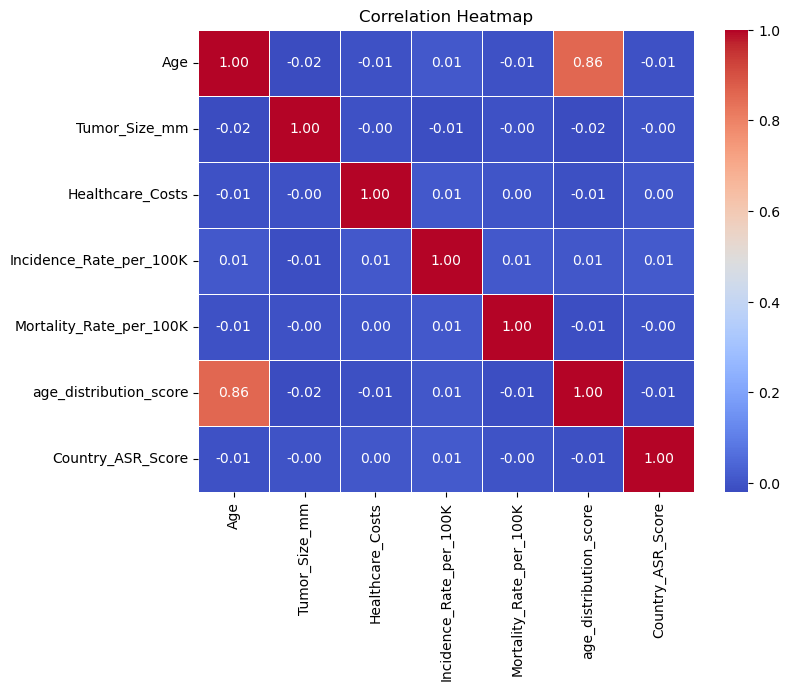

In [48]:
# 3. Correlation Heatmap (for continuous variables)
corr_matrix = df[['Age', 'Tumor_Size_mm', 'Healthcare_Costs', 
                  'Incidence_Rate_per_100K', 'Mortality_Rate_per_100K', 
                  'age_distribution_score', 'Country_ASR_Score']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Strongest Correlation
* Age vs Age Distribution Score: 0.86
* This is the only strong positive correlation, which makes sense—older populations are likely contributing to higher age distribution scores, possibly reflecting demographic weighting.

Negligible or No Correlation
* Tumor Size, Healthcare Costs, Incidence Rate, Mortality Rate, Country ASR Score show almost no linear correlation with each other or with Age.
* Correlations are all near 0, indicating:
* These factors might influence outcomes independently.
* Also, relationships could be non-linear or confounded by other variables not included here.
* Tumor_Size_mm has virtually no correlation with any other variable—suggesting tumor size might vary independently of age, cost, or national health metrics.
* Healthcare_Costs don’t correlate strongly with Incidence or Mortality either, which could imply variations in healthcare spending efficiency or cost structures between countries or cases.
* Country_ASR_Score (likely an age-standardized rate score) is weakly correlated with all factors, potentially due to its adjusted nature.

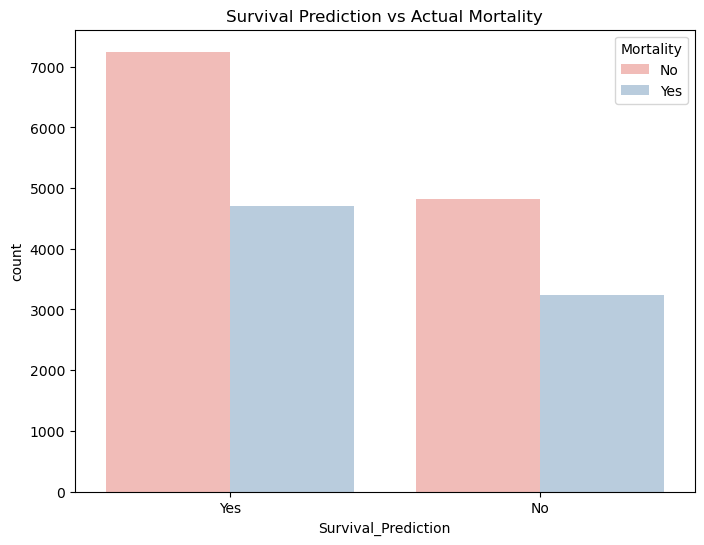

In [50]:
# 4. Survival Prediction vs Mortality (Count Plot)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Survival_Prediction', hue='Mortality', palette='Pastel1')
plt.title('Survival Prediction vs Actual Mortality')
plt.show()

Survival_Prediction = Yes
* Majority survived (Mortality = No): ~7300 cases
* But a notable portion died (Mortality = Yes): ~4700 cases
* Model is partially accurate here, but: There's a significant number of false positives (patients predicted to survive but didn’t).

Survival_Prediction = No
* Some still survived (Mortality = No): ~4800 cases
* And some died (Mortality = Yes): ~3300 cases
* This shows the model is also misclassifying some who were predicted not to survive but actually did.

So in the stage III, we will try to surpass this prediction performance by using advanced ML techniques. After making exploratory data analysis, categories/parameters that has more impact on survival prediction (which one has higher weights) will be known, which will hopefully help us to acquire a better ML model with higher prediction performance.

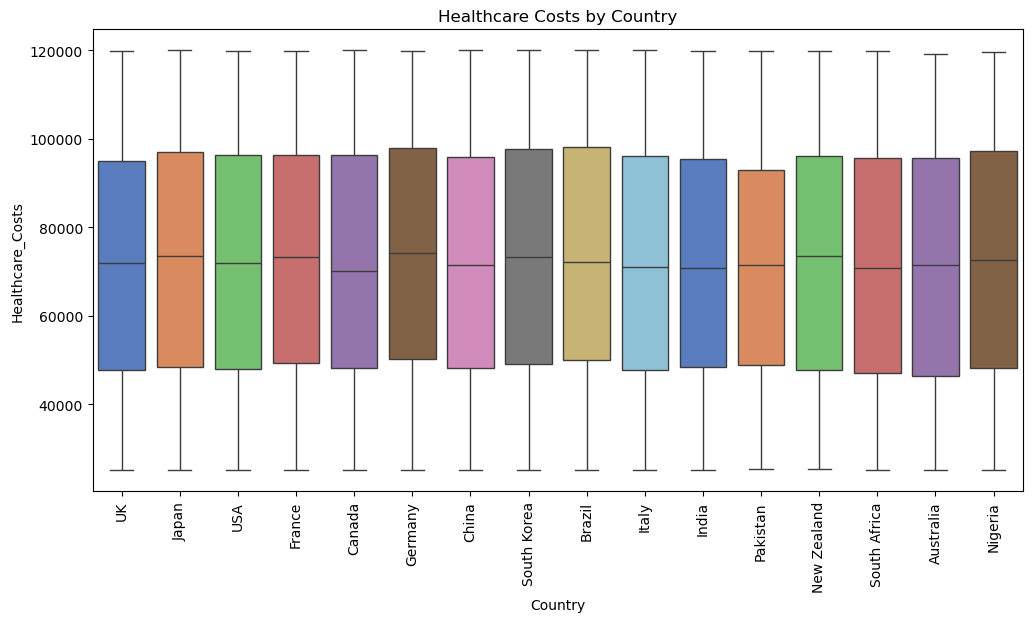

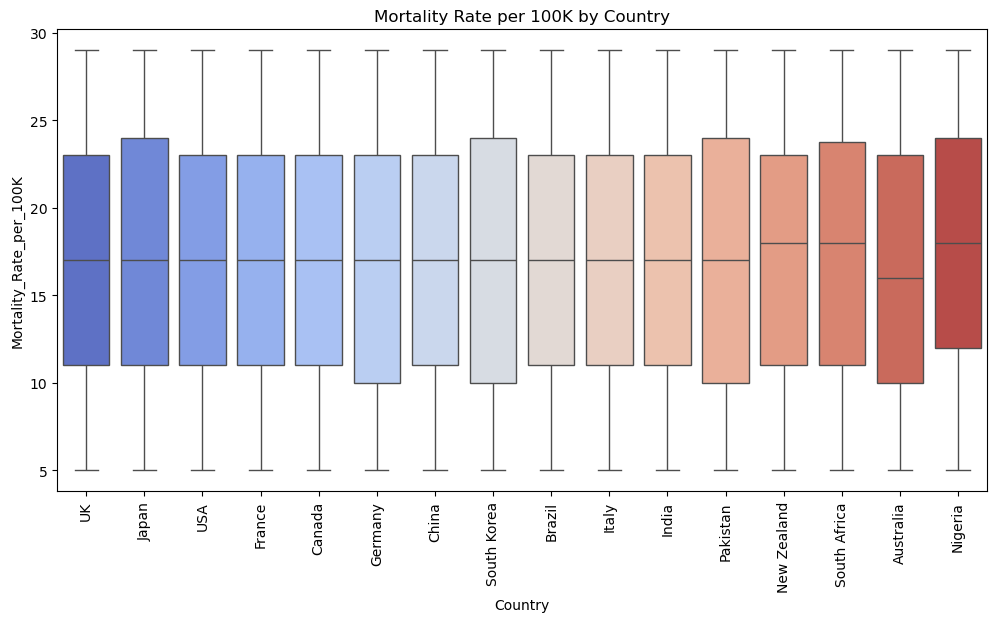

In [52]:
# 5. Country-Based Analysis (Example: Healthcare Costs by Country)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Country', y='Healthcare_Costs', palette='muted')
plt.title('Healthcare Costs by Country')
plt.xticks(rotation=90)
plt.show()

# Example: Mortality Rate by Country
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Country', y='Mortality_Rate_per_100K', palette='coolwarm')
plt.title('Mortality Rate per 100K by Country')
plt.xticks(rotation=90)
plt.show()

Healthcare Costs by Country
* Each country exhibits a wide spread of costs, suggesting substantial variability within healthcare systems.
* The median costs (middle line in each box) seem relatively similar among countries, but the range (minimum to maximum) is very wide, indicating that outliers or extreme cases are common.

Mortality Rate per 100K by Country
* The range is narrower than in the healthcare cost plot, suggesting more consistency in mortality rates.
* Some countries such as Nigeria, Pakistan, and South Africa appear to have a wider range and slightly higher median mortality, which may reflect disparities in early detection, treatment access, or healthcare infrastructure.
* In contrast, countries like Japan, Germany, and France seem to have lower median mortality rates, which could indicate more effective screening programs or healthcare interventions.

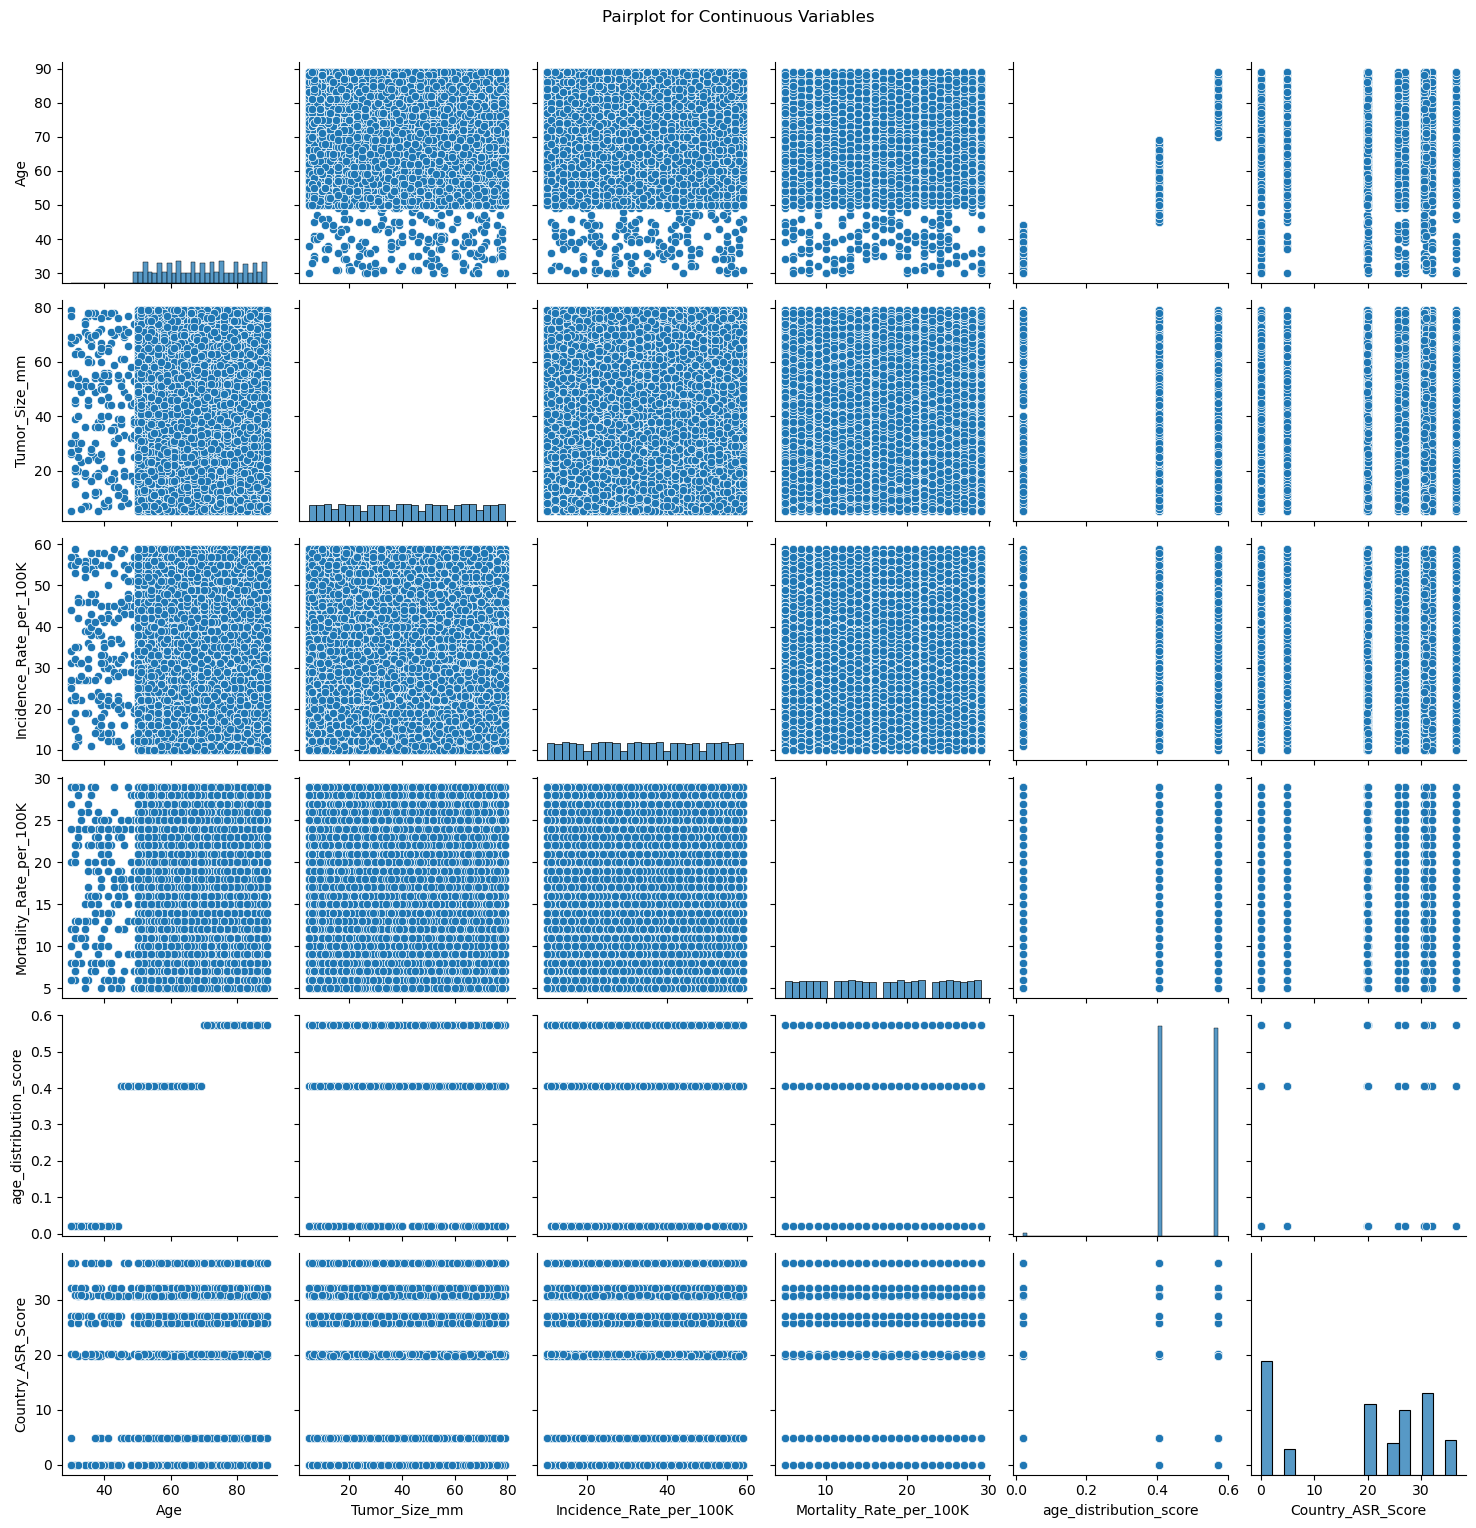

In [225]:
sns.pairplot(df[['Age','Tumor_Size_mm','Incidence_Rate_per_100K',
                 'Mortality_Rate_per_100K','age_distribution_score',
                'Country_ASR_Score']])
plt.suptitle('Pairplot for Continuous Variables', y=1.02)
plt.show()

Age vs. Tumor_Size_mm:
* No strong correlation is visible — tumor size appears fairly randomly distributed across ages.
* Could suggest tumor size doesn't systematically increase with age in your dataset.

Incidence_Rate_per_100K & Mortality_Rate_per_100K:
* These are positively correlated — as incidence increases, mortality tends to increase too.
* This makes sense, as countries with higher reported cases may also have more deaths unless mitigated by strong healthcare systems.

age_distribution_score:
* It seems fairly discrete or categorical, not continuous — possibly bucketed scores (like low, medium, high risk).
* Its distribution appears clustered, possibly indicating country-level or group-level effects.

Country_ASR_Score:
* Also appears categorical, with a few distinct values across the dataset.
* Not much spread in relationships with other variables, indicating it might be better interpreted qualitatively or with categorical analysis.

### Continent-based Analysis

In [197]:
country_to_continent = {
    # North America
    'USA': 'North America', 'Canada': 'North America', 'Mexico': 'North America', 
    'Guatemala': 'North America', 'Honduras': 'North America', 'Costa Rica': 'North America', 
    'Panama': 'North America', 'Cuba': 'North America', 'Dominican Republic': 'North America', 
    'Jamaica': 'North America', 'Trinidad and Tobago': 'North America', 'Barbados': 'North America', 
    
    # South America
    'Brazil': 'South America', 'Argentina': 'South America', 'Colombia': 'South America', 
    'Chile': 'South America', 'Peru': 'South America', 'Venezuela': 'South America', 
    'Ecuador': 'South America', 'Bolivia': 'South America', 'Paraguay': 'South America', 
    'Uruguay': 'South America', 'Guyana': 'South America', 'Suriname': 'South America', 
    'French Guiana': 'South America',

    # Europe
    'Germany': 'Europe', 'France': 'Europe', 'UK': 'Europe', 'Italy': 'Europe', 'Spain': 'Europe', 
    'Russia': 'Europe', 'Ukraine': 'Europe', 'Poland': 'Europe', 'Romania': 'Europe', 'Netherlands': 'Europe', 
    'Belgium': 'Europe', 'Greece': 'Europe', 'Czech Republic': 'Europe', 'Portugal': 'Europe', 
    'Sweden': 'Europe', 'Hungary': 'Europe', 'Belarus': 'Europe', 'Austria': 'Europe', 'Switzerland': 'Europe', 
    'Bulgaria': 'Europe', 'Serbia': 'Europe', 'Croatia': 'Europe', 'Slovakia': 'Europe', 'Slovenia': 'Europe', 
    'Norway': 'Europe', 'Finland': 'Europe', 'Denmark': 'Europe', 'Ireland': 'Europe', 'Lithuania': 'Europe', 
    'Latvia': 'Europe', 'Estonia': 'Europe', 'Moldova': 'Europe', 'Albania': 'Europe', 'North Macedonia': 'Europe', 
    'Kosovo': 'Europe', 'Monaco': 'Europe', 'Andorra': 'Europe', 'Liechtenstein': 'Europe', 'San Marino': 'Europe', 
    'Vatican City': 'Europe', 'Malta': 'Europe',

    # Asia
    'China': 'Asia', 'India': 'Asia', 'Japan': 'Asia', 'South Korea': 'Asia', 'Indonesia': 'Asia', 
    'Pakistan': 'Asia', 'Bangladesh': 'Asia', 'Russia': 'Asia', 'Vietnam': 'Asia', 'Philippines': 'Asia', 
    'Turkey': 'Asia', 'Iran': 'Asia', 'Saudi Arabia': 'Asia', 'Iraq': 'Asia', 'Afghanistan': 'Asia', 
    'Uzbekistan': 'Asia', 'Malaysia': 'Asia', 'Yemen': 'Asia', 'Nepal': 'Asia', 'Sri Lanka': 'Asia', 
    'Kazakhstan': 'Asia', 'Syria': 'Asia', 'Cambodia': 'Asia', 'Jordan': 'Asia', 'Azerbaijan': 'Asia', 
    'United Arab Emirates': 'Asia', 'Tajikistan': 'Asia', 'Israel': 'Asia', 'Laos': 'Asia', 'Kyrgyzstan': 'Asia', 
    'Turkmenistan': 'Asia', 'Singapore': 'Asia', 'Oman': 'Asia', 'State of Palestine': 'Asia', 
    'Kuwait': 'Asia', 'Mongolia': 'Asia', 'Armenia': 'Asia', 'Qatar': 'Asia', 'Bahrain': 'Asia', 
    'Timor-Leste': 'Asia', 'Cyprus': 'Asia',

    # Africa
    'South Africa': 'Africa', 'Nigeria': 'Africa', 'Kenya': 'Africa', 'Uganda': 'Africa', 
    'Algeria': 'Africa', 'Sudan': 'Africa', 'Morocco': 'Africa', 'Angola': 'Africa', 'Mozambique': 'Africa', 
    'Ghana': 'Africa', 'Madagascar': 'Africa', 'Cameroon': 'Africa', 'Côte d\'Ivoire': 'Africa', 
    'Niger': 'Africa', 'Burkina Faso': 'Africa', 'Mali': 'Africa', 'Malawi': 'Africa', 'Zambia': 'Africa', 
    'Senegal': 'Africa', 'Chad': 'Africa', 'Rwanda': 'Africa', 'Guinea': 'Africa', 'Benin': 'Africa', 
    'Burundi': 'Africa', 'Tunisia': 'Africa', 'South Sudan': 'Africa', 'Tanzania': 'Africa', 
    'Somalia': 'Africa', 'Togo': 'Africa', 'Sierra Leone': 'Africa', 'Libya': 'Africa', 'Congo': 'Africa', 
    'Liberia': 'Africa', 'Mauritius': 'Africa', 'Eswatini': 'Africa', 'Equatorial Guinea': 'Africa', 
    'Djibouti': 'Africa', 'Comoros': 'Africa', 'Seychelles': 'Africa', 'Central African Republic': 'Africa', 
    'Gabon': 'Africa', 'Lesotho': 'Africa', 'Mauritania': 'Africa', 'Eritrea': 'Africa',

    # Oceania
    'Australia': 'Oceania', 'New Zealand': 'Oceania', 'Papua New Guinea': 'Oceania', 
    'Fiji': 'Oceania', 'Solomon Islands': 'Oceania', 'Vanuatu': 'Oceania', 'Samoa': 'Oceania', 
    'Tonga': 'Oceania', 'Micronesia': 'Oceania', 'Palau': 'Oceania', 'Marshall Islands': 'Oceania', 
    'Nauru': 'Oceania', 'Tuvalu': 'Oceania', 'Kiribati': 'Oceania'
}


In [203]:
# Assuming your dataframe is named `df` and has a 'Country' column
# Map countries to continents
df['Continent'] = df['Country'].map(country_to_continent)
df[['Continent','Country']].head(10)

,Continent,Country
0,Europe,UK
1,Europe,UK
2,Asia,Japan
3,North America,USA
4,Europe,France
5,Asia,Japan
6,North America,Canada
7,Europe,Germany
8,North America,USA
9,Asia,Japan


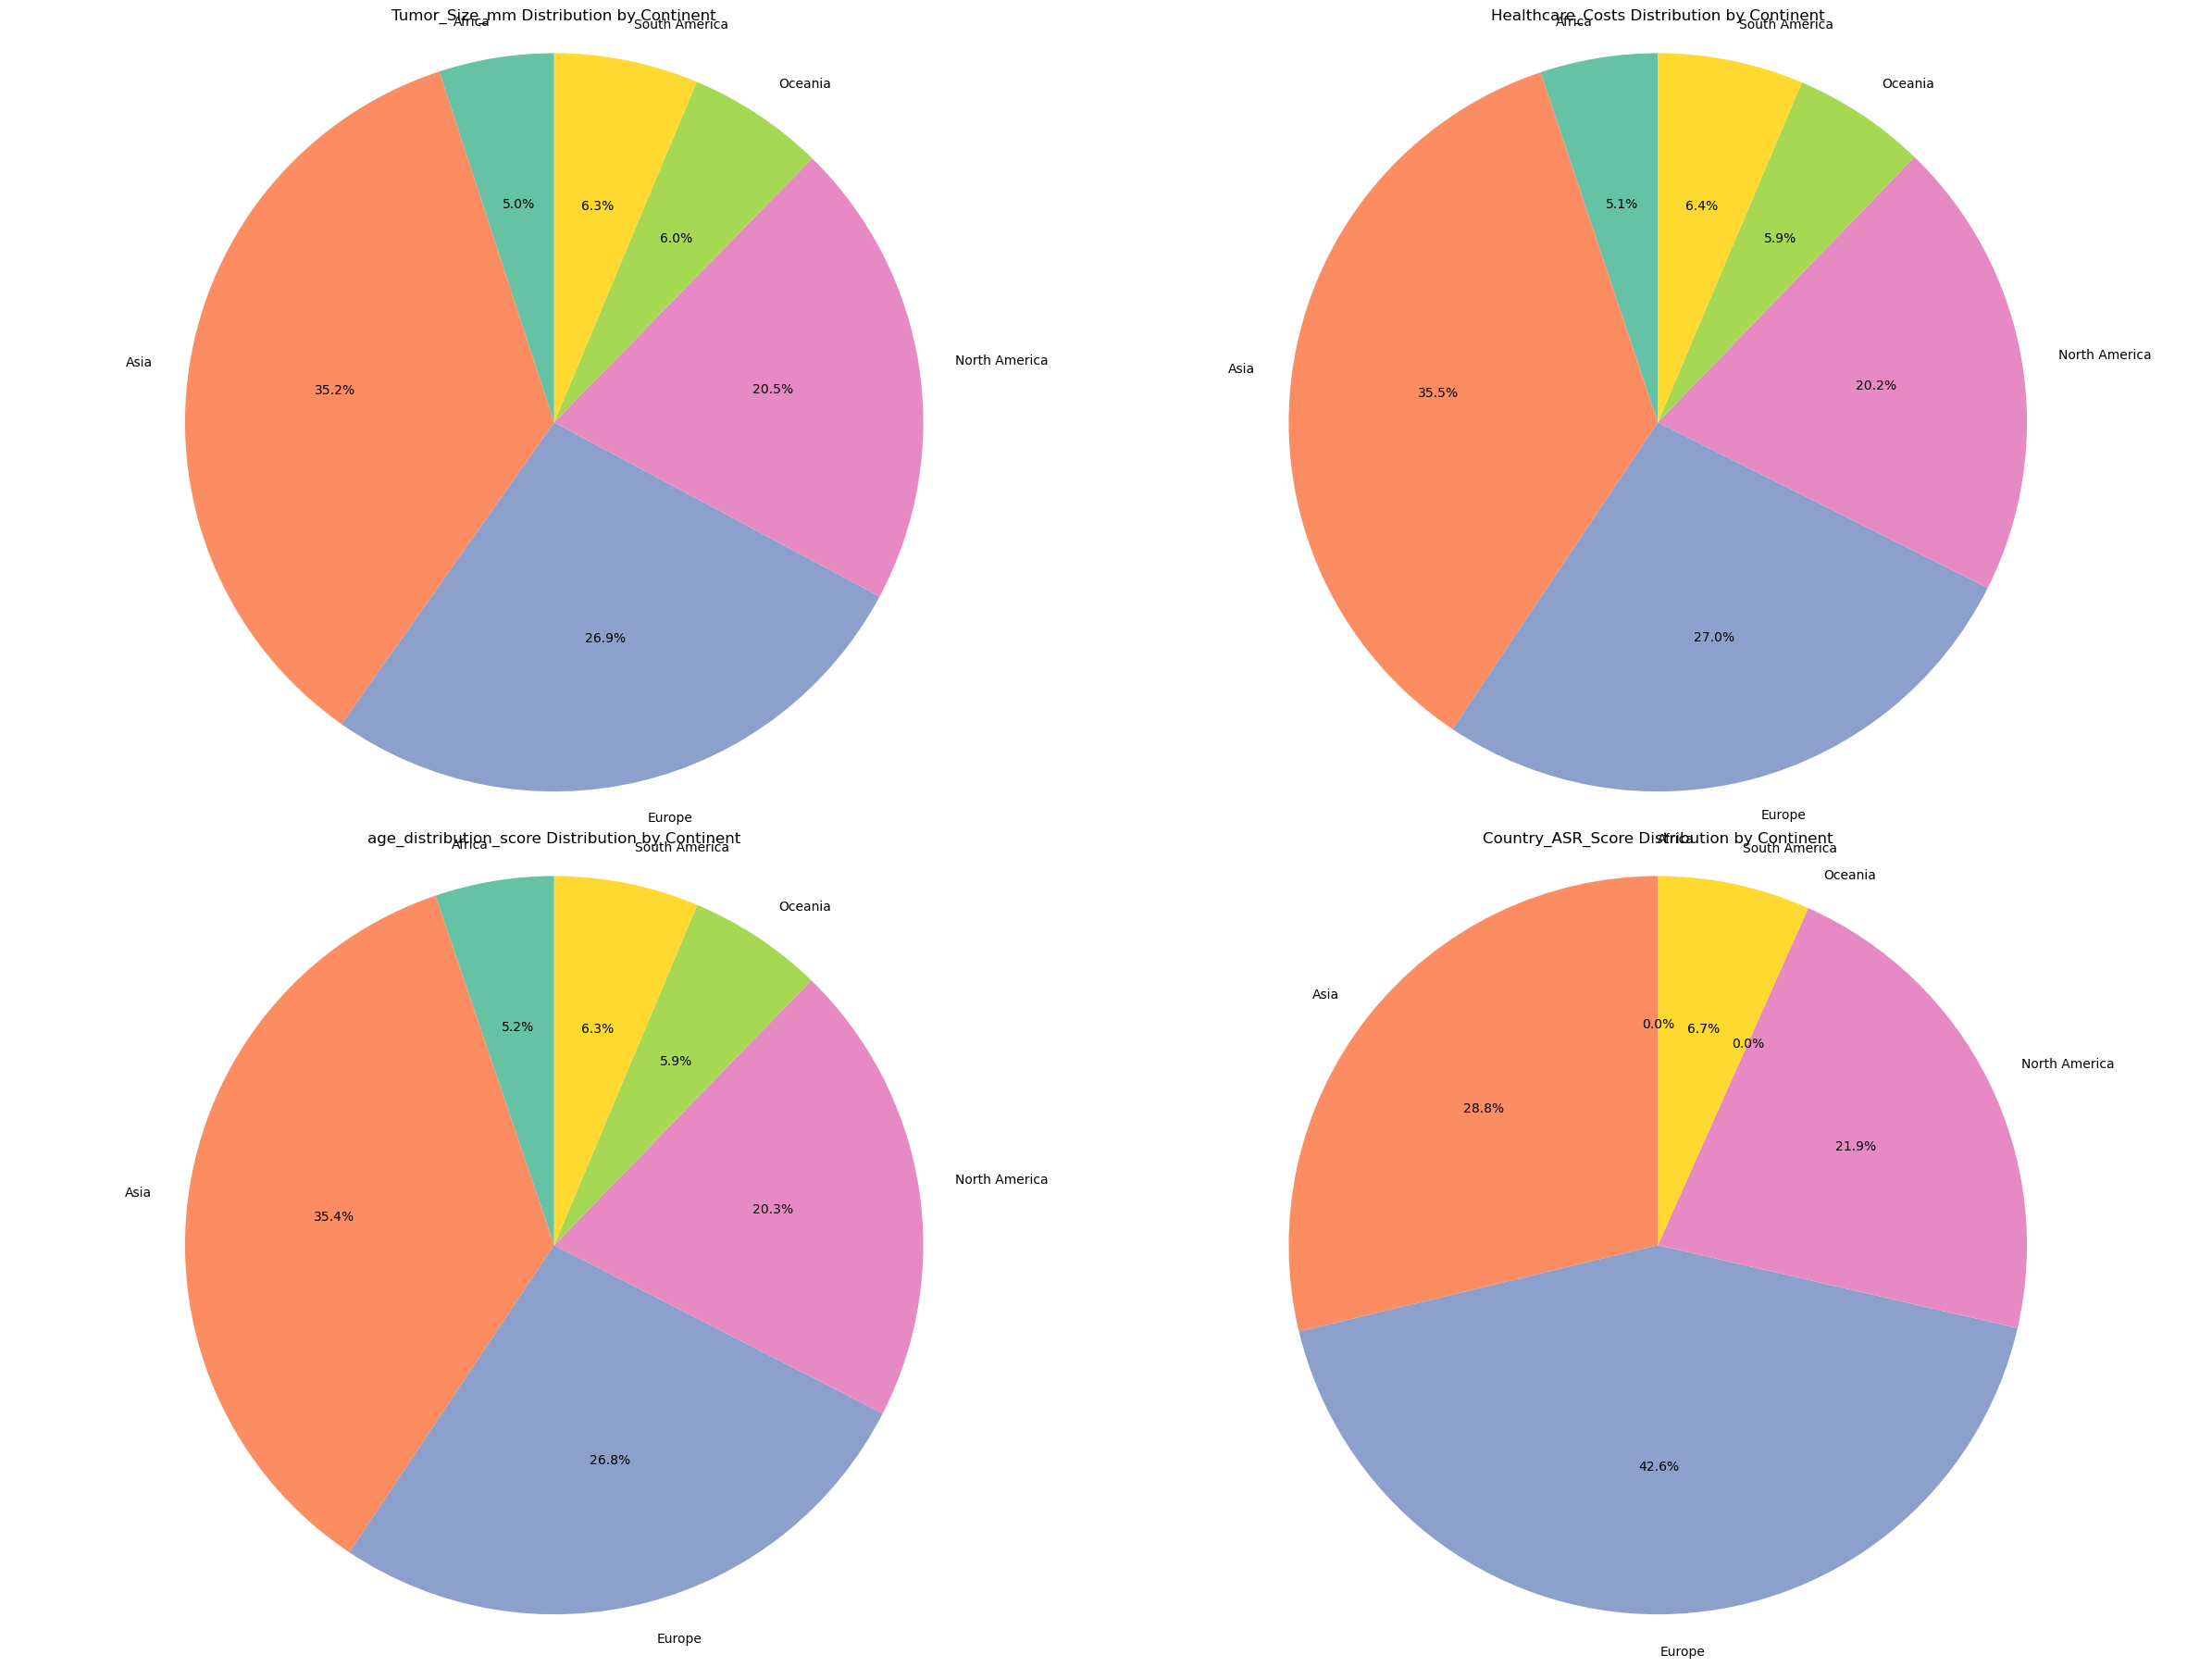

In [250]:
# Define the numerical columns from which we will calculate the total score
numerical_vars = ['Tumor_Size_mm', 'Healthcare_Costs', 'age_distribution_score', 'Country_ASR_Score']

# Set the figure size for the pie charts
plt.figure(figsize=(24, 18))

# Iterate through each of the numerical columns
for i, var in enumerate(numerical_vars, 1):
    # Group the data by 'Continent' and calculate the sum of the current variable
    continent_scores = df.groupby('Continent')[var].sum().reset_index()

    # Create a pie chart for the current variable
    plt.subplot(2, 2, i)  # 2 rows and 2 columns to fit all the pie charts
    plt.pie(continent_scores[var], labels=continent_scores['Continent'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', len(continent_scores)))
    
    # Add title
    plt.title(f'{var} Distribution by Continent')
    plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Tumor Size (mm) Distribution by Continent
* Asia leads with the largest share (35.2%), followed by Europe (26.3%) and North America (20.5%).
* Indicates that the majority of tumor size data points come from Asia, possibly due to higher case counts or more comprehensive reporting.

Healthcare Costs Distribution by Continent
* Asia (29.5%) and Europe (27.0%) dominate healthcare cost contributions, with North America (20.2%) close behind.
* This could reflect both population size and the number of colorectal cancer cases being treated.

Age Distribution Score by Continent
* Again, Asia (33.4%) and Europe (26.8%) contribute most to the age distribution score, aligning with global aging patterns and population structure.
* This may suggest a larger elderly population being tracked or higher age-related risks.

Country ASR Score Distribution by Continent
* Europe is most prominent here with a huge 42.6% share, followed by Asia (28.8%) and North America (21.9%).
* ASR (Age-Standardized Rate) is often used to compare cancer risk across populations adjusted for age — this suggests European countries contribute most to the standardized burden in this dataset.

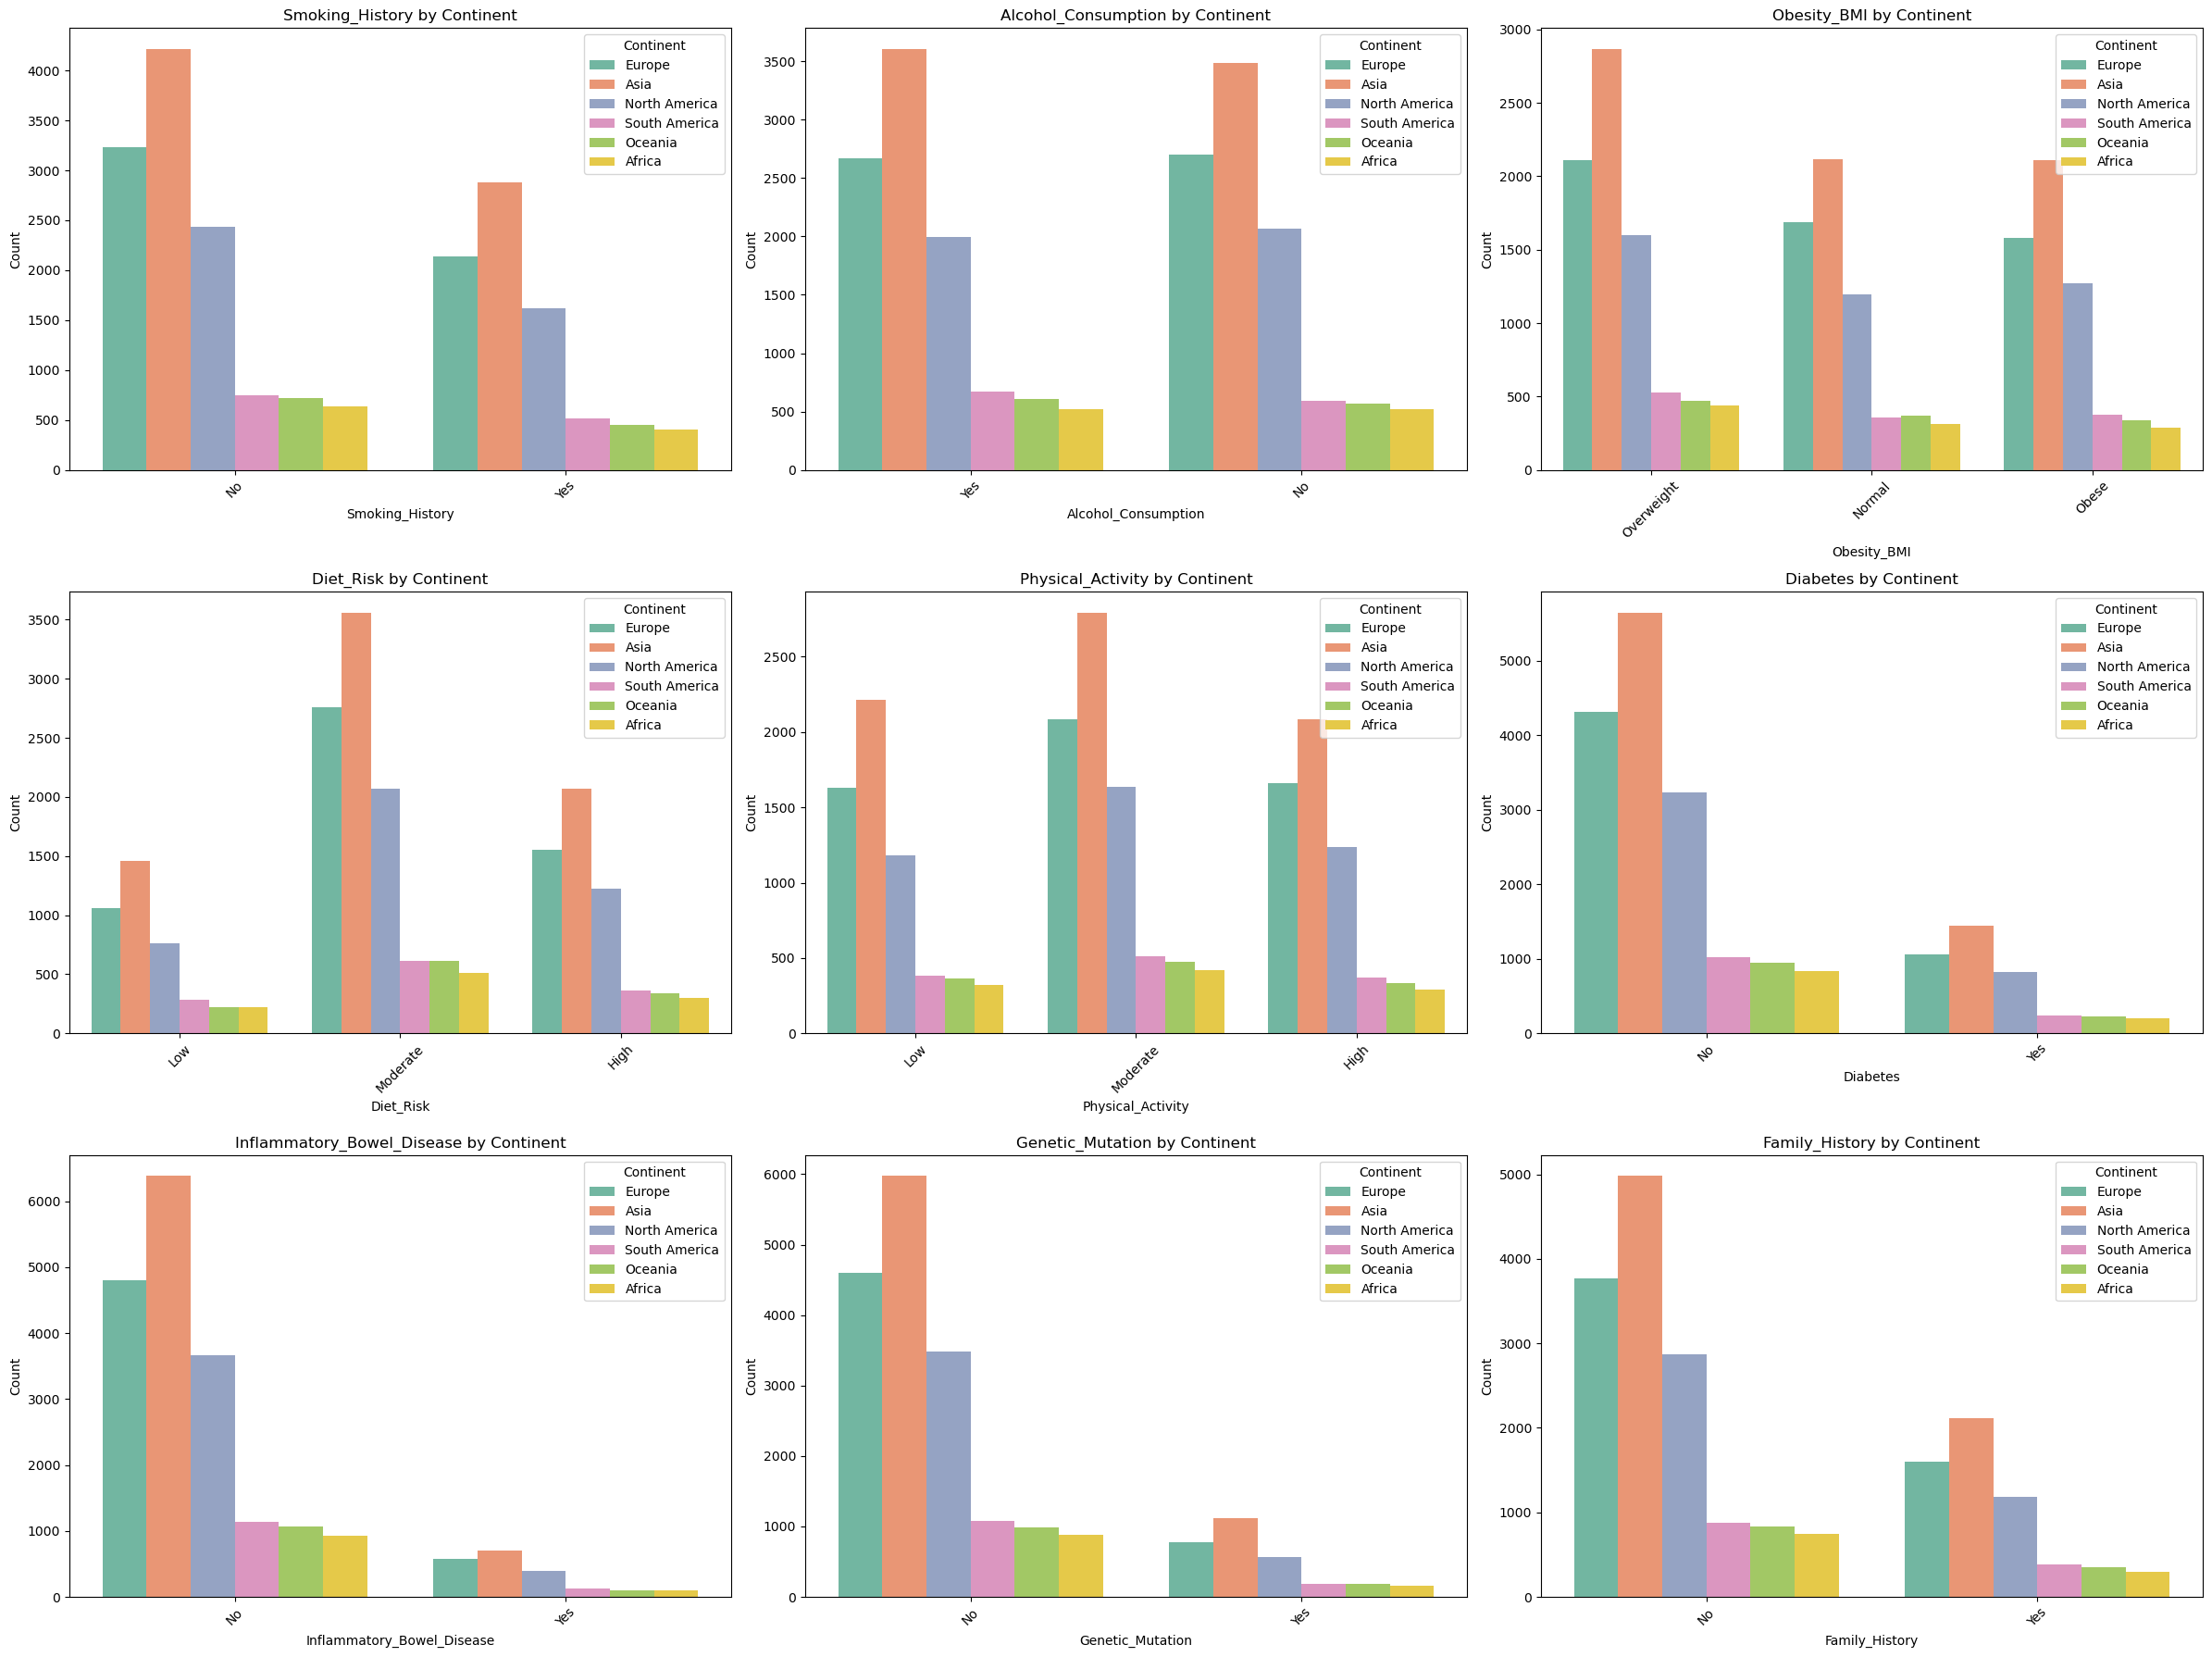

In [252]:
categorical_vars = ['Smoking_History', 'Alcohol_Consumption', 'Obesity_BMI', 
                    'Diet_Risk', 'Physical_Activity', 'Diabetes', 
                    'Inflammatory_Bowel_Disease','Genetic_Mutation','Family_History']

# Set the figure size for the subplots
plt.figure(figsize=(24, 18))

# Iterate through each categorical variable to create plots
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)  # 3 rows and 3 columns to fit all the plots
    sns.countplot(data=df, x=var, hue='Continent', palette='Set2')
    plt.title(f'{var} by Continent')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Smoking History
* Asia and Europe show the highest counts of individuals with a smoking history.
* Smoking is a major modifiable risk factor, and the regional difference highlights potential areas for tobacco control interventions.

Alcohol Consumption
* Similar to smoking, Europe and Asia report the most alcohol use, with North America following.
* This aligns with cultural drinking norms and access patterns.

Diet Risk
* Europe leads in high-risk diets, closely followed by Asia.
* Indicates higher consumption of processed/red meat or lower fiber diets in these regions.

Obesity (BMI)
* A significant proportion of Europeans and North Americans fall into overweight/obese categories.
* Reflects diet and activity-related lifestyle trends contributing to colorectal cancer.

Physical Activity
* Asia and Europe again show high counts for low physical activity levels — a key risk factor.
* This could point to sedentary work/lifestyle patterns despite population sizes.
    
Diabetes
* Asia and Europe show the highest number of diabetic individuals.
* Diabetes is increasingly linked with colorectal cancer risk due to shared metabolic pathways.

Inflammatory Bowel Disease (IBD)
* Most prevalent in Europe and Asia, though counts are lower than other factors.
* Reflects better diagnostic awareness and registry practices in these regions.

Genetic Mutation
* Clear majority of reported no mutation, but Asia and Europe dominate again where mutation is reported.
* Suggests more access to genetic testing or awareness.

Family History
* Europe and Asia show higher counts of individuals with a family history of colorectal cancer.
* Important for early screening and risk stratification

In [254]:
# Check the unique values and the distribution of the survival ratio
print(df['Survival_5_years_numerical'].value_counts())

Survival_5_years_numerical
1    11999
0     8001
Name: count, dtype: int64


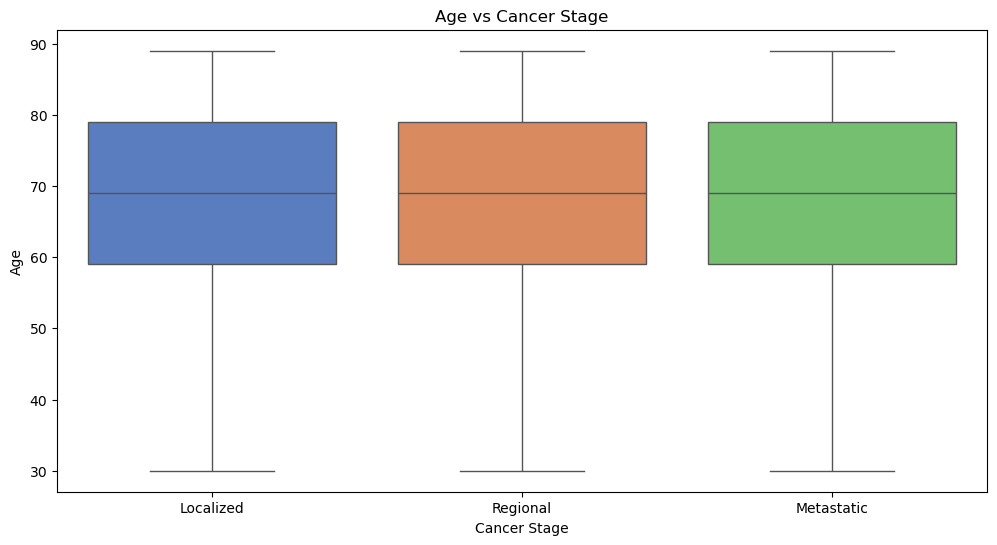

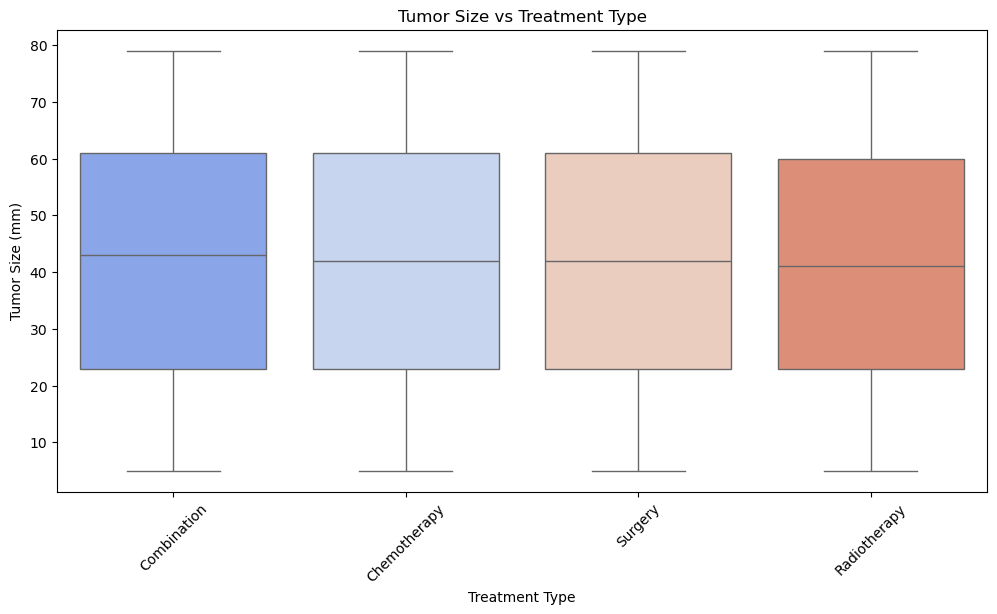

In [76]:
# 2. Box Plot for Continuous Variables by Categorical Data
plt.figure(figsize=(12, 6))

# Age vs Cancer Stage
sns.boxplot(data=df, x='Cancer_Stage', y='Age', palette='muted')
plt.title('Age vs Cancer Stage')
plt.xlabel('Cancer Stage')
plt.ylabel('Age')
plt.show()

# Tumor Size vs Treatment Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Treatment_Type', y='Tumor_Size_mm', palette='coolwarm')
plt.title('Tumor Size vs Treatment Type')
plt.xlabel('Treatment Type')
plt.ylabel('Tumor Size (mm)')
plt.xticks(rotation=45)
plt.show()


Age vs Cancer Stage
* Median age is very similar across all three cancer stages (Localized, Regional, Metastatic), hovering around 68–70 years.
* All stages show a wide age range (approx. 30 to 90 years), suggesting:
* Age alone is not a strong indicator of how far cancer has progressed at diagnosis.
* Other factors (genetics, screening access, lifestyle) likely drive stage at detection.

Tumor Size vs Treatment Type
* All four treatment types — Combination, Chemotherapy, Surgery, Radiotherapy — show similar tumor size distributions:
* Median tumor size around 40–42 mm
* Range: ~5 mm to nearly 80 mm

Subtle differences:
* Surgery and Combination therapy appear slightly more common for larger tumors (notice the slightly higher upper quartiles).
* Chemotherapy and Radiotherapy also show wide distributions, indicating flexibility across tumor sizes — likely used in both advanced and non-surgical cases.

## Hypothesis Testing

#### Null and Alternative Hypotheses

- **Null Hypothesis ($\large{H_0}$)**: There is no significant difference in the survival rates between patients in the American continents and other continents.
- **Alternative Hypothesis ($\large{H_A}$)**: Colorectal cancer patients in the American continents have lower survival rates compared to other continents.

#### Test Type Selection

- Since Survival_5_years and Mortality across continents will be used, which are all categorical variable, and we are interested in determining if there is a significant difference, the Chi-Square Test of Independence is appropriate. This test will check if there is a significant association between Continent and Survival_5_years and Mortality.

#### Chi-Square Statistic Test

In [299]:
import scipy.stats as stats

# Define the columns you want to perform the test on
columns_to_test = ['Survival_5_years_numerical', 'Mortality']

# Iterate through each column and perform the Chi-Square test
for column in columns_to_test:
    print(f"\nPerforming Chi-Square test for {column} by Continent\n" + "-"*50)

    # 1. Create a contingency table for Continent and the selected column
    contingency_table = pd.crosstab(df['Continent'], df[column])

    # 2. Perform the Chi-Square test of independence
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

    # 3. Print the results
    print("Chi-Square Statistic:", chi2_stat)
    print("p-value:", p_value)
    print("Degrees of Freedom:", dof)
    print("Expected Frequencies Table:\n", expected)
    print()
    # 4. Conclusion based on p-value
    alpha = 0.05  # Significance level
    
    if p_value <= alpha:
        print(f"Reject the Null Hypothesis for {column}: There is a significant relationship between continent and {column.lower()}.")
    else:
        print(f"Fail to Reject the Null Hypothesis for {column}: No significant relationship between continent and {column.lower()}.")



Performing Chi-Square test for Survival_5_years_numerical by Continent
--------------------------------------------------
Chi-Square Statistic: 8.270593994403265
p-value: 0.14193972043960507
Degrees of Freedom: 5
Expected Frequencies Table:
 [[ 414.4518   621.5482 ]
 [2836.75455 4254.24545]
 [2150.26875 3224.73125]
 [1624.203   2435.797  ]
 [ 470.05875  704.94125]
 [ 505.26315  757.73685]]

Fail to Reject the Null Hypothesis for Survival_5_years_numerical: No significant relationship between continent and survival_5_years_numerical.

Performing Chi-Square test for Mortality by Continent
--------------------------------------------------
Chi-Square Statistic: 6.986902833242879
p-value: 0.22161618472787317
Degrees of Freedom: 5
Expected Frequencies Table:
 [[ 624.967    411.033  ]
 [4277.64575 2813.35425]
 [3242.46875 2132.53125]
 [2449.195   1610.805  ]
 [ 708.81875  466.18125]
 [ 761.90475  501.09525]]

Fail to Reject the Null Hypothesis for Mortality: No significant relationship betw

#### Results of Hypothesis Testing

- Fail to Reject the Null Hypothesis for Survival_5_years_numerical: No significant relationship between continent and survival_5_years_numerical.
- Fail to Reject the Null Hypothesis for Mortality: No significant relationship between continent and mortality.
- These results show that the data does not provide enough information to prove our hypothesis (alternative hypothesis), so we stick with null hypothesis. 